# MODEL BUILDING 

***IMPORTING LIBRARIES***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
final=pd.read_csv('final_data.csv')

In [3]:
final

,DATE,US HOME PRICE INDEX,GROSS DEMOSTRIC PRODUCT,HOMEOWNERSHIP RATE,HOUSING STARTS,MEDIAN SALES PRICE,MORTGAGE RATE,POPULATION,UNEMP RATE
0,2003-01-01,5.552657,11174.129,68.0,1853.0,12.133507,5.9160,289412.0,1.916923
1,2003-02-01,5.559566,0.000,68.0,1629.0,12.133507,5.8425,289606.0,1.931521
2,2003-03-01,5.565654,0.000,68.0,1726.0,12.133507,5.7450,289809.0,1.931521
3,2003-04-01,5.571272,11312.766,68.0,1643.0,12.164214,5.8125,290024.0,1.945910
4,2003-05-01,5.577728,0.000,68.0,1751.0,12.164214,5.4840,290250.0,1.960095
...,...,...,...,...,...,...,...,...,...
242,2023-03-01,5.669023,0.000,66.0,1380.0,12.969215,6.5440,334753.0,1.504077
243,2023-04-01,5.669023,27063.012,65.9,1348.0,12.944435,6.3425,334880.0,1.481605
244,2023-05-01,5.669023,0.000,65.9,1583.0,12.944435,6.4250,335013.0,1.547563
245,2023-06-01,5.669023,0.000,65.9,1418.0,12.944435,6.7140,335163.0,1.526056


# Data splitting  and scaling
### train set -test-set

In [4]:
x=final.drop(columns=['DATE',"US HOME PRICE INDEX"])
y=final['US HOME PRICE INDEX']

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

## MODEL TRAINING

In [7]:
model=LassoCV(alphas=np.logspace(-4,4,100),cv=5)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [8]:
optimal_alpha=model.alpha_
MSE=mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(MSE)
r2=r2_score(y_test,y_pred)

In [9]:
print(f'optimal_alpha:{optimal_alpha:0.4f}')
print(f'mean_squared_error(MSE):{MSE:.2f}')
print(f'RMSE:{RMSE:0.2f}')
print(f'R_squared(R^2):{r2:.2f}')

optimal_alpha:0.0001
mean_squared_error(MSE):0.02
RMSE:0.13
R_squared(R^2):0.64


### Cross_validation

In [10]:
cross_val_scores=cross_val_score(model,x_train,y_train,cv=5,scoring='r2')
print('cross_validation R_Squared scores:')
print(cross_val_scores)

cross_validation R_Squared scores:
[ 0.93846638 -0.02819838  0.94570699  0.75579813  0.86890068]


In [11]:
mean_r2=cross_val_scores.mean()
std_r2=cross_val_scores.std()
print(f'mean R_squared:{mean_r2:.4f}')
print(f'standard_deviation of R_squared:{std_r2:.4f}')

mean R_squared:0.6961
standard_deviation of R_squared:0.3685


In [12]:
print(0.1*RMSE)
print(0.1*final["US HOME PRICE INDEX"].mean())
#rmse should be less than 10% of the mean of us home price index

0.012818785629647396
0.5211430121483004


# Most Prominent features and least prominent features

In [13]:
lasso_coefs=model.coef_
feature_names=x.columns
coef_final=pd.DataFrame({'Feature':feature_names,'Coefficient':lasso_coefs})
non_zero_coefs_final=coef_final[coef_final['Coefficient']!=0]
zero_coefs_final=coef_final[coef_final['Coefficient']==0]

In [14]:
non_zero_coefs_final

,Feature,Coefficient
1,HOMEOWNERSHIP RATE,0.073474
2,HOUSING STARTS,0.053351
3,MEDIAN SALES PRICE,0.091066
4,MORTGAGE RATE,0.022082
5,POPULATION,0.114393
6,UNEMP RATE,-0.031504


In [15]:
zero_coefs_final

,Feature,Coefficient
0,GROSS DEMOSTRIC PRODUCT,-0.0


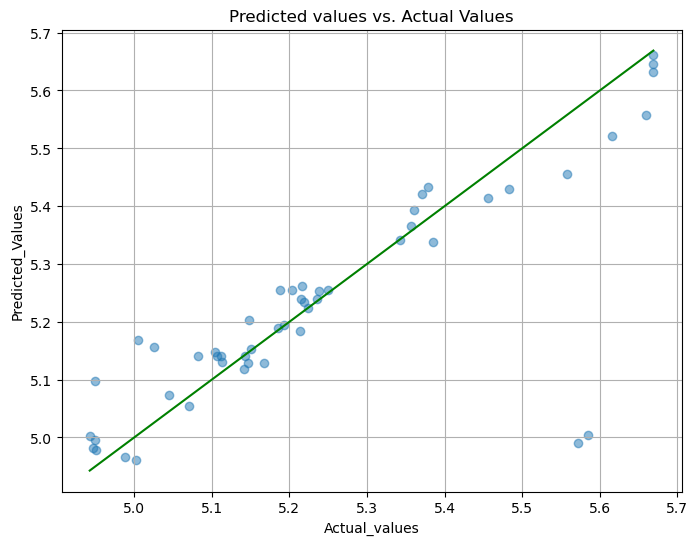

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual_values")
plt.ylabel("Predicted_Values")
plt.title("Predicted values vs. Actual Values")
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)
x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color='green', linestyle='-')
plt.show()